# Árboles de Decisión y Ensembles


In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.colors import ListedColormap

Primero generamos los datos:

In [8]:
#--------------------------------------------------------------------------------
# genera_puntos_gaussiana2D(Npuntos, media, var1, var2, angulo)
#
# Npuntos: numero de puntos a generar
# media:   media de la Gaussiana (2 dimensiones)
# var1:    varianza en el eje principal 1
# var2:    varianza en el eje principal 2
# angulo:  angulo a rotar (en grados) en el sentido contrario a las
#          agujas del reloj
#--------------------------------------------------------------------------------
def genera_puntos_gausiana2D(Npuntos, media, var1, var2, angulo):

    X = np.random.randn(2, Npuntos)
    X[0,:] = X[0,:] * np.sqrt(var1) # se multiplica cada atributo por la
    X[1,:] = X[1,:] * np.sqrt(var2) # raiz cuadrada de la varianza deseada

    X = rota_datos_alrededor_origen(X, angulo)

    X[0,:] = media[0] + X[0,:]
    X[1,:] = media[1] + X[1,:]

    return X.transpose()

#--------------------------------------------------------------------------------
# function X_rotados = rota_datos_alrededor_origen(X, angulo)
#
# esta funcion rota datos 2D en torno al origen
# angulo: en grados, y en contra de las agujas del reloj
#--------------------------------------------------------------------------------
def rota_datos_alrededor_origen(X, angulo):

    angle_rad = angulo*2.0*np.pi/360.0

    s = np.sin(angle_rad)
    c = np.cos(angle_rad)
    matriz_rotacion = np.array([[c,-s],[s,c]])
    X_rotados = matriz_rotacion@X # se rotan los puntos generados

    return X_rotados

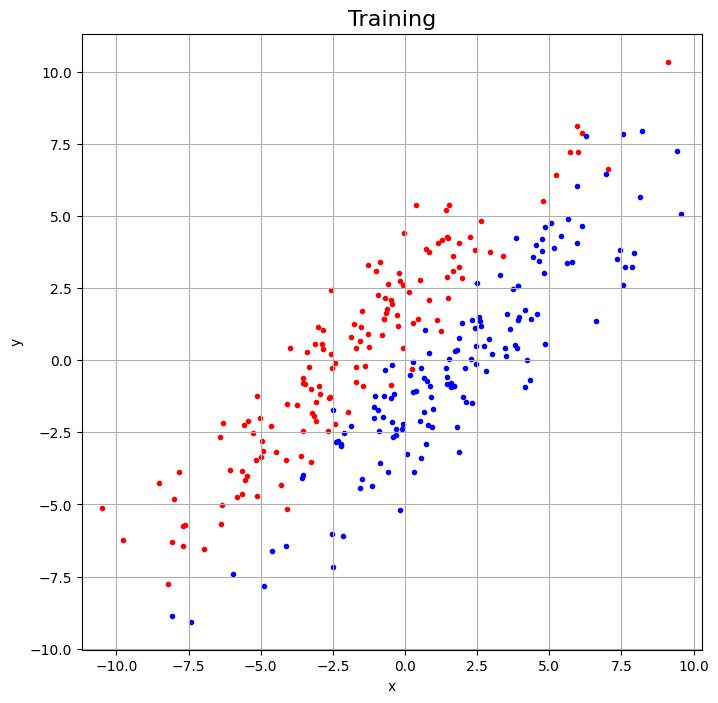

In [9]:
N1 = 200
N2 = 200

X_clase1 = genera_puntos_gausiana2D(N1,[-2,0],20,1,45)
X_clase2 = genera_puntos_gausiana2D(N2,[2,0],20,1,45)
X = np.concatenate((X_clase1, X_clase2), axis=0) # las junto en una sola matriz X:
clases = np.concatenate((1*np.ones(N1), 2*np.ones(N2)))

# Partimos en training/test:
from sklearn.model_selection import train_test_split
porc_test = 0.3
X_train, X_test, clases_train, clases_test = train_test_split(X, clases, test_size=porc_test)

# ahora sacaremos estos datos que nos serán útiles después:
inds1_tr = np.where(clases_train == 1)[0]
inds2_tr = np.where(clases_train == 2)[0]
X_clase1_tr = X_train[inds1_tr,:]
X_clase2_tr = X_train[inds2_tr,:]

plt.figure(figsize=(8, 8))
plt.plot(X_clase1_tr[:,0], X_clase1_tr[:,1], 'r.', X_clase2_tr[:,0], X_clase2_tr[:,1], 'b.', zorder=1)
plt.grid(True)
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Training', fontsize=16)
plt.show()

### Ahora analizaremos la tasa de acierto de diferentes clasificadores:

In [10]:
#--------------------------------------------------------------------------------
# function clasifica(X_train, clases_train, X_test, clases_test, clf)
#--------------------------------------------------------------------------------
def clasifica_2clases(X_train, clases_train, X_test, clases_test, clf):

    # Clasificamos:
    clf.fit(X_train, clases_train)

    # Dibujamos resultados:
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    hx = (x_max - x_min) / 100.
    hy = (y_max - y_min) / 100.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        c = max(np.fabs(z))
        z = 20.0*z / c
        z = 2.0 / (1.0 + np.exp(-z)) - 1
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    tam_fuente = 14
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    z = z.reshape(xx.shape)
    figure = plt.figure(figsize=(15, 5))
    ax = plt.subplot(1, 3, 1)
    ax.contourf(xx, yy, z, cmap=cm, alpha=.8)
    ax.contour(xx, yy, z, [0.5], linewidths=[2], colors=['k'])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.xlabel("x", fontsize=tam_fuente)
    plt.ylabel("y", fontsize=tam_fuente)
    plt.grid(True)

    z = z.reshape(xx.shape)
    ax = plt.subplot(1, 3, 2)
    ax.contourf(xx, yy, z, cmap=cm, alpha=.8)
    ax.contour(xx, yy, z, [0.5], linewidths=[2], colors=['k'])
    _x = np.array(X_train[:, 0]).ravel()
    _y = np.array(X_train[:, 1]).ravel()
    ax.scatter(_x, _y, c=clases_train, cmap=cm_bright)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.title("Training", fontsize=tam_fuente)
    plt.xlabel("x", fontsize=tam_fuente)
    plt.ylabel("y", fontsize=tam_fuente)
    plt.grid(True)

    ax = plt.subplot(1, 3, 3)
    ax.contourf(xx, yy, z, cmap=cm, alpha=.8)
    ax.contour(xx, yy, z, [0.5], linewidths=[2], colors=['k'])
    _x = np.array(X_test[:, 0]).ravel()
    _y = np.array(X_test[:, 1]).ravel()
    ax.scatter(_x, _y, c=clases_test, cmap=cm_bright)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.title("Test", fontsize=tam_fuente)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

    a = np.unique(clases_train)
    inds1_tr = clases_train == a[0]
    inds2_tr = clases_train == a[1]

    inds1_te = clases_test == a[0]
    inds2_te = clases_test == a[1]

    plt.show()

    print("Score training = %f" % (clf.score(X_train, clases_train)))
    print("Score test = %f" % (clf.score(X_test, clases_test)))

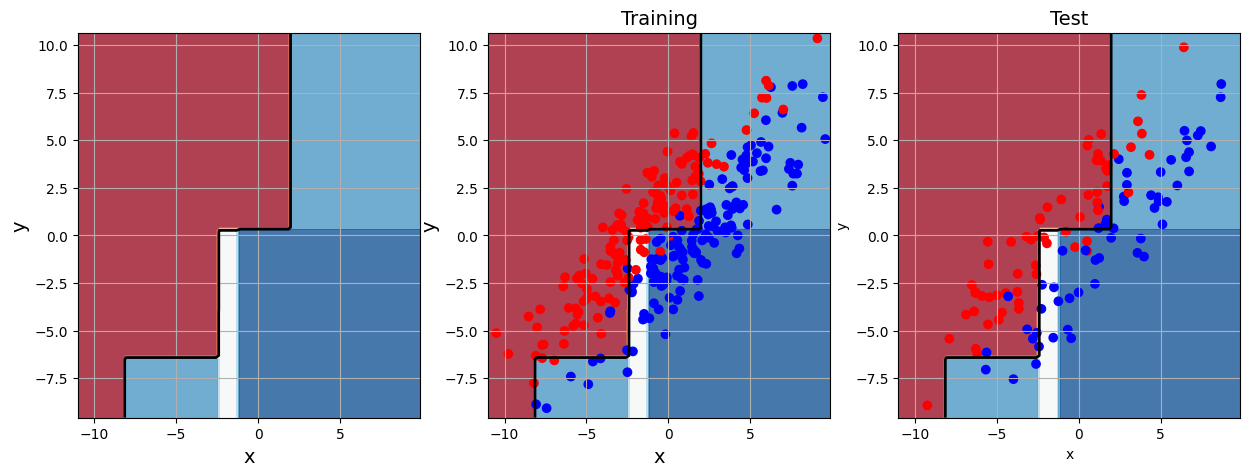

Score training = 0.900000
Score test = 0.808333


In [11]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
max_depth = 3
clf =  DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
clasifica_2clases(X_train, clases_train, X_test, clases_test, clf)

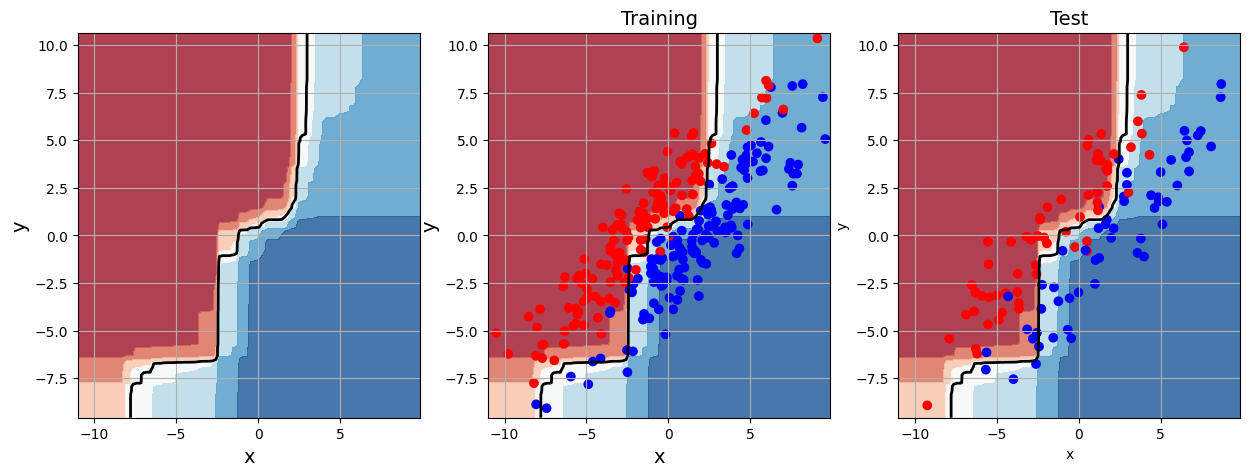

Score training = 0.928571
Score test = 0.850000


In [12]:
# Ensembles: Bagging
n_classifiers = 501
from sklearn.ensemble import BaggingClassifier

clf =  BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         max_samples=1.0,
                         max_features=1.0, n_estimators=n_classifiers)
clasifica_2clases(X_train, clases_train, X_test, clases_test, clf)


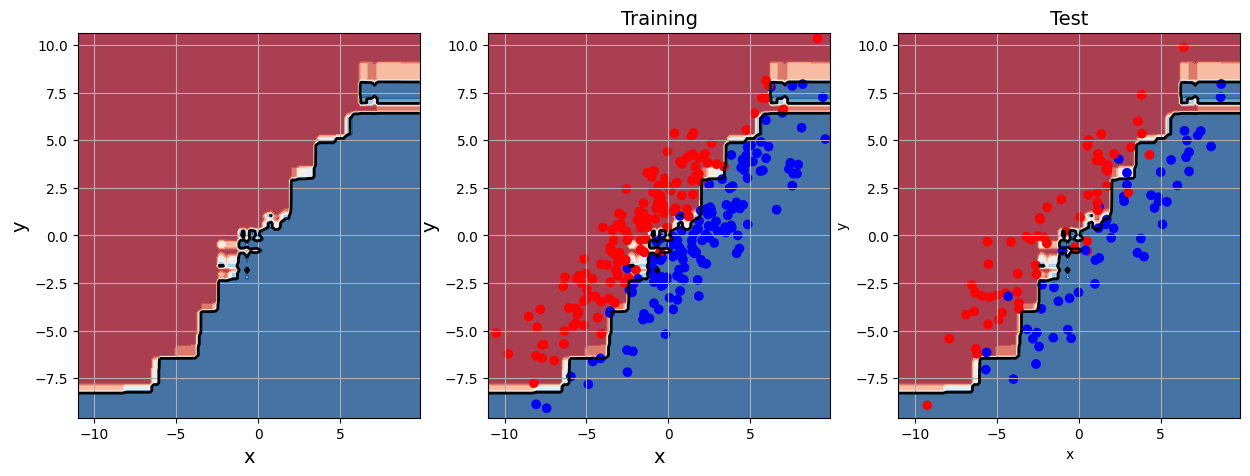

Score training = 1.000000
Score test = 0.891667


In [13]:
# Ensembles: Adaboost
n_classifiers = 501
from sklearn.ensemble import AdaBoostClassifier

clf =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         algorithm="SAMME",
                         n_estimators=n_classifiers)

clasifica_2clases(X_train, clases_train, X_test, clases_test, clf)


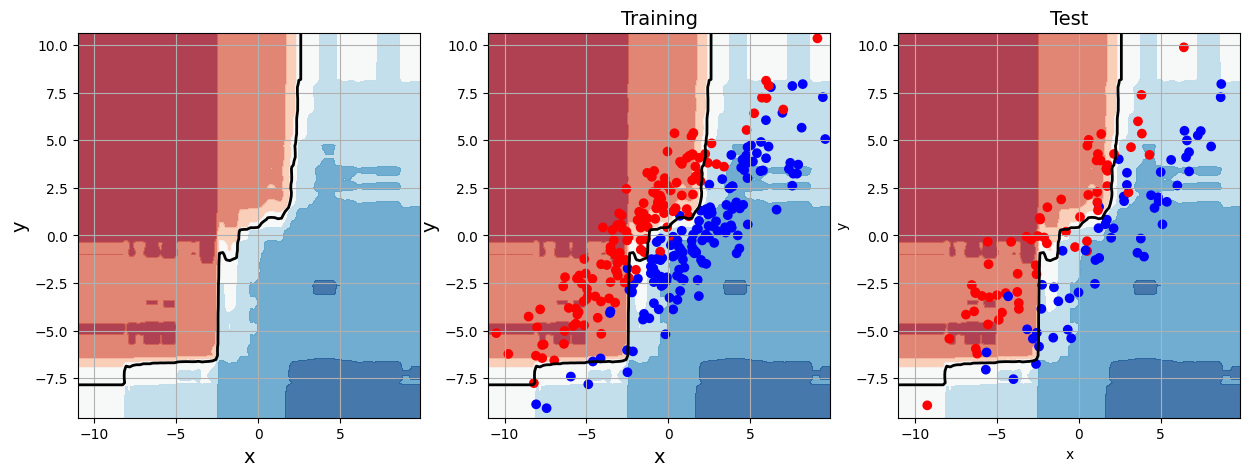

Score training = 0.928571
Score test = 0.850000


In [14]:
# Ensembles: Random Forests
n_classifiers = 501
from sklearn.ensemble import RandomForestClassifier

clf =  RandomForestClassifier(max_depth=max_depth,
                              n_estimators=n_classifiers)

clasifica_2clases(X_train, clases_train, X_test, clases_test, clf)

### Bias-variance para decision trees:

In [15]:
#--------------------------------------------------------------------------------
# function clasifica(X_train, clases_train, X_test, clases_test, clf)
#--------------------------------------------------------------------------------
def clasifica_2clases_bis(lista_clf):

    # Dibujamos resultados:
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    hx = (x_max - x_min) / 100.
    hy = (y_max - y_min) / 100.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))

    zz = np.zeros_like(xx)

    for clf in lista_clf:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        zz += z.reshape(xx.shape)
    zz /= len(lista_clf)

    tam_fuente = 14
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    figure = plt.figure(figsize=(10, 5))
    ax = plt.subplot(1, 2, 1)
    ax.contourf(xx, yy, zz, cmap=cm, alpha=.8)
    ax.contour(xx, yy, zz, [0.5], linewidths=[2], colors=['k'])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.xlabel("x", fontsize=tam_fuente)
    plt.ylabel("y", fontsize=tam_fuente)
    plt.grid(True)

    ax = plt.subplot(1, 2, 2)
    ax.contourf(xx, yy, zz, cmap=cm, alpha=.8)
    for clf in lista_clf:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        zz = z.reshape(xx.shape)
        ax.contour(xx, yy, zz, [0.5], linewidths=[1], colors=['k'])

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.xlabel("x", fontsize=tam_fuente)
    plt.ylabel("y", fontsize=tam_fuente)
    plt.grid(True)

    plt.show()

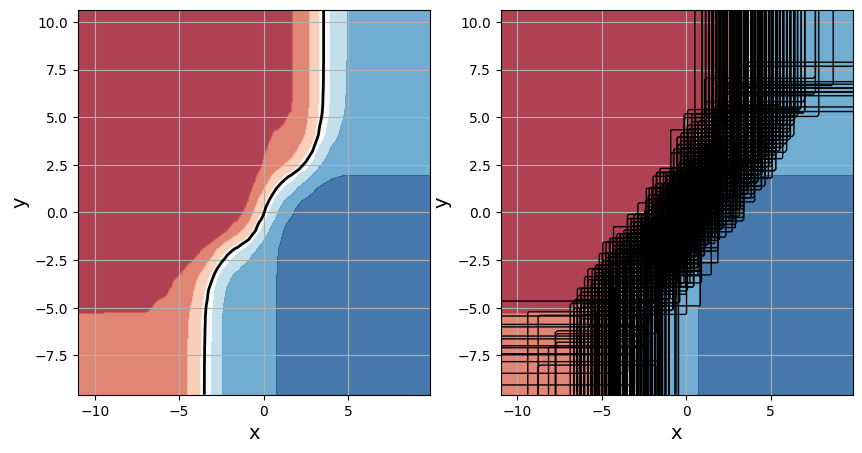

In [16]:
# Decision tree - muchos clasificadores:
max_depth = 3
num_models = 1000

lista_clasificadores = []
for i in range(num_models):
    X_clase1 = genera_puntos_gausiana2D(N1,[-2,0],20,1,45)
    X_clase2 = genera_puntos_gausiana2D(N2,[2,0],20,1,45)
    X = np.concatenate((X_clase1, X_clase2), axis=0)
    clases = np.concatenate((1*np.ones(N1), 2*np.ones(N2)))

    clf =  DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
    clf.fit(X, clases)
    lista_clasificadores.append(clf)

clasifica_2clases_bis(lista_clasificadores)


### Bias-variance para bagging:

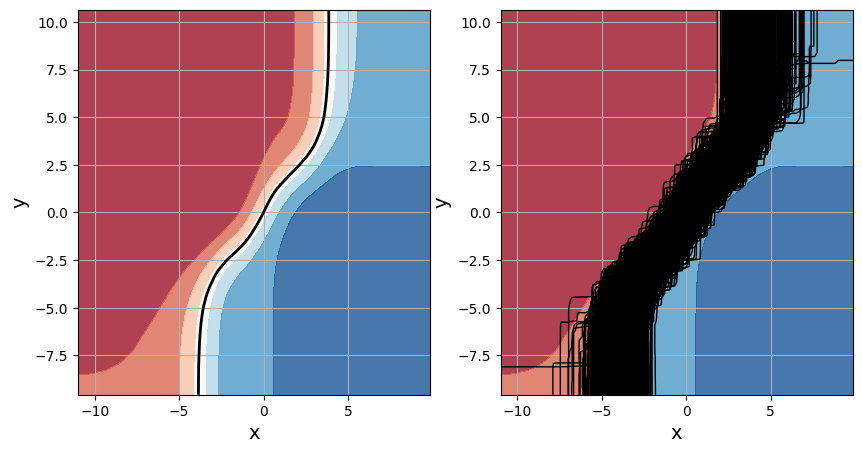

In [17]:
# Bagging - muchos clasificadores:
max_depth = 3
num_models = 1000
n_classifiers = 501

lista_clasificadores = []
for i in range(num_models):
    X_clase1 = genera_puntos_gausiana2D(N1,[-2,0],20,1,45)
    X_clase2 = genera_puntos_gausiana2D(N2,[2,0],20,1,45)
    X = np.concatenate((X_clase1, X_clase2), axis=0)
    clases = np.concatenate((1*np.ones(N1), 2*np.ones(N2)))

    clf =  BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         max_samples=1.0,
                         max_features=1.0, n_estimators=n_classifiers)
    clf.fit(X, clases)
    lista_clasificadores.append(clf)

clasifica_2clases_bis(lista_clasificadores)

### Bias-variance para boosting:

In [ ]:
# Boosting - muchos clasificadores:
max_depth = 3
num_models = 1000
n_classifiers = 501

lista_clasificadores = []
for i in range(num_models):
    X_clase1 = genera_puntos_gausiana2D(N1,[-2,0],20,1,45)
    X_clase2 = genera_puntos_gausiana2D(N2,[2,0],20,1,45)
    X = np.concatenate((X_clase1, X_clase2), axis=0)
    clases = np.concatenate((1*np.ones(N1), 2*np.ones(N2)))

    clf =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         algorithm="SAMME",
                         n_estimators=n_classifiers)

    clf.fit(X, clases)
    lista_clasificadores.append(clf)

clasifica_2clases_bis(lista_clasificadores)

### Pima:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skpp
from sklearn.model_selection import GridSearchCV

# Cargamos los datos:
fP = 'pimaND.csv'
dfP = pd.read_csv(fP, sep=',')
lVarsTarg = dfP.columns
print(lVarsTarg)

# Estandarizamos los datos, salvo la última columna que es la clase:
scalerX = skpp.StandardScaler()
X = scalerX.fit_transform( dfP[ lVarsTarg[ : -1] ] )
clases = dfP['label']

# Separamos en dos conjuntos, training y test:
X_train, X_test, clases_train, clases_test = train_test_split(X, clases, test_size=0.3, random_state=10)

Index(['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin',
       'massIndex', 'pedigree', 'age', 'label'],
      dtype='object')


#### Simple decision tree:

In [ ]:
max_depth = 8
clf =  DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
clf.fit(X_train, clases_train)
print("Score training = %f" % clf.score(X_train, clases_train))
print("Score test = %f" % clf.score(X_test, clases_test))

Score training = 0.927374
Score test = 0.701299


#### Bagging:

In [ ]:
clf =  BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         max_samples=1.0,
                         max_features=1.0, n_estimators=n_classifiers, oob_score=True)
clf.fit(X_train, clases_train)
print("Score training = %f" % clf.score(X_train, clases_train))
print("Score test = %f" % clf.score(X_test, clases_test))
print("Score oob = %f" % clf.oob_score_)

Score training = 0.990689
Score test = 0.766234
Score oob = 0.754190


#### Boosting:

In [ ]:
clf =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         algorithm="SAMME",
                         n_estimators=n_classifiers)
clf.fit(X_train, clases_train)
print("Score training = %f" % clf.score(X_train, clases_train))
print("Score test = %f" % clf.score(X_test, clases_test))

Score training = 1.000000
Score test = 0.740260


Feature importances:

In [ ]:
s = pd.Series(clf.feature_importances_, index=lVarsTarg[:-1])
s.sort_values(inplace=True)

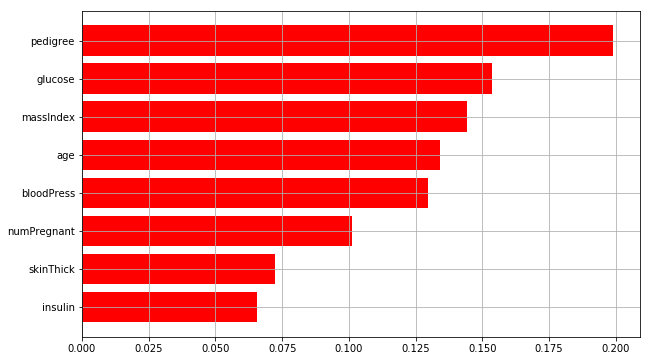

In [ ]:
nvars = s.shape[0]
plt.figure(figsize=(10, 6))
plt.barh(np.array(range(nvars)), s.values, align = 'center', color = 'red', tick_label = s.index)
plt.grid(True)
plt.show()

#### Random Forest:

In [ ]:
clf =  RandomForestClassifier(max_depth=max_depth,
                              n_estimators=n_classifiers, oob_score=True)
clf.fit(X_train, clases_train)
print("Score training = %f" % clf.score(X_train, clases_train))
print("Score test = %f" % clf.score(X_test, clases_test))
print("Score oob = %f" % clf.oob_score_)

Score training = 0.968343
Score test = 0.748918
Score oob = 0.754190


Feature importances:

In [ ]:
s = pd.Series(clf.feature_importances_, index=lVarsTarg[:-1])
s.sort_values(inplace=True)

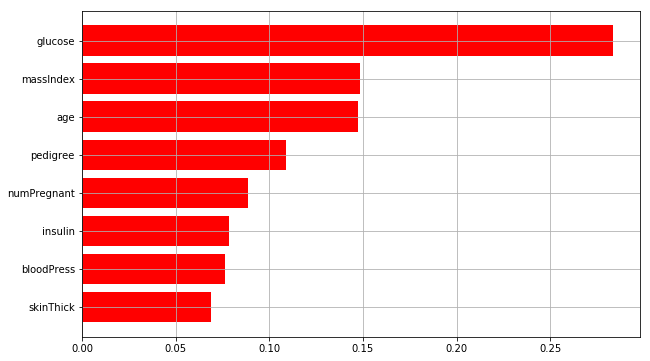

In [ ]:
nvars = s.shape[0]
plt.figure(figsize=(10, 6))
plt.barh(np.array(range(nvars)), s.values, align = 'center', color = 'red', tick_label = s.index)
plt.grid(True)
plt.show()